In [ ]:
import cv2 

img = cv2.imread('/home/likcos/DataSets/sportimages/sportimages/basket/basket2_0001.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(),'C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
C:\Users\anais\AppData\Local\Temp\ipykernel_16952\2122050391.py:14: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


leyendo imagenes de  C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\americano 1
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\basket 9348
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\beisball 8823
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\boxeo 7752
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\ciclismo 7125
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\f1 7533
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\futbol 5053
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\golf 7617
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\natacion 9768
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/sportimages\tenis 5172
Directorios l

# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  77128


In [5]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 americano
1 basket
2 beisball
3 boxeo
4 ciclismo
5 f1
6 futbol
7 golf
8 natacion
9 tenis


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (61702, 21, 28, 3) (61702,)
Testing data shape :  (15426, 21, 28, 3) (15426,)


Text(0.5, 1.0, 'Ground Truth : 6')

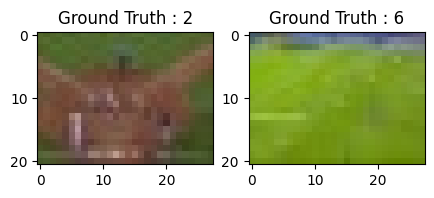

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

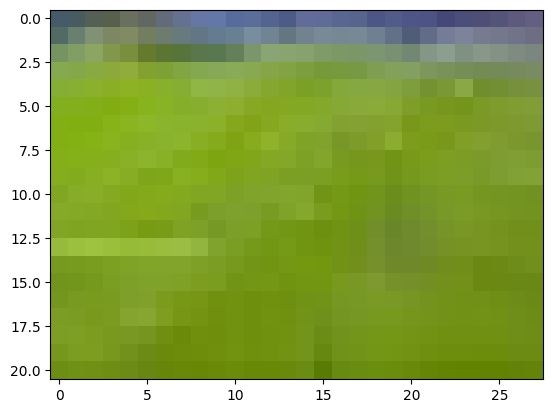

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(49361, 21, 28, 3) (12341, 21, 28, 3) (49361, 10) (12341, 10)


# Creamos el modelo de CNN

In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
# sport_model.add(Dropout(0.5))


sport_model.add(Flatten())
sport_model.add(Dense(64, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

sport_model.add(Flatten())
sport_model.add(Dense(128, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

c:\Users\anais\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\anais\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [15]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 21, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 21, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       315,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,700 (1.22 MB)

 Trainable params: 319,700 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

c:\Users\anais\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1077 - loss: 2.3015 - val_accuracy: 0.1189 - val_loss: 2.2979
Epoch 2/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1189 - loss: 2.2951 - val_accuracy: 0.1191 - val_loss: 2.2931
Epoch 3/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1227 - loss: 2.2909 - val_accuracy: 0.1192 - val_loss: 2.2896
Epoch 4/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1242 - loss: 2.2880 - val_accuracy: 0.1428 - val_loss: 2.2869
Epoch 5/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1264 - loss: 2.2853 - val_accuracy: 0.1273 - val_loss: 2.2844
Epoch 6/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.1241 - loss: 2.2826 - val_accuracy: 0.1265 - val_loss: 2.2820
Epoch 7/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1263 - loss: 2.2804 - val_accuracy: 0.1265 - val_loss: 2.2795
Epoch 8/20
772/772 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1297 - loss: 2.2781 - val_acc

In [19]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/ModelosH5/modelo_sport3.h5")

# Evaluamos la red

In [20]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2541 - loss: 2.1200


In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.120021104812622
Test accuracy: 0.2540515959262848


In [22]:
sport_train.history

{'accuracy': [0.10767610371112823,
  0.11885901540517807,
  0.1227487251162529,
  0.1242276281118393,
  0.12641559541225433,
  0.12414659559726715,
  0.12625351548194885,
  0.12965701520442963,
  0.12866432964801788,
  0.12971779704093933,
  0.13040660321712494,
  0.1359575390815735,
  0.14201495051383972,
  0.15656085312366486,
  0.18095257878303528,
  0.2052227407693863,
  0.22217945754528046,
  0.23151880502700806,
  0.23388910293579102,
  0.23441582918167114],
 'loss': [2.3014721870422363,
  2.2951464653015137,
  2.2908782958984375,
  2.2879536151885986,
  2.285263776779175,
  2.282590627670288,
  2.2804195880889893,
  2.2781455516815186,
  2.275120973587036,
  2.2716410160064697,
  2.266728401184082,
  2.2606043815612793,
  2.2526519298553467,
  2.2432236671447754,
  2.2316455841064453,
  2.2181432247161865,
  2.2017297744750977,
  2.1843926906585693,
  2.168480157852173,
  2.1497206687927246],
 'val_accuracy': [0.11887205392122269,
  0.11911514401435852,
  0.11919617652893066,
  

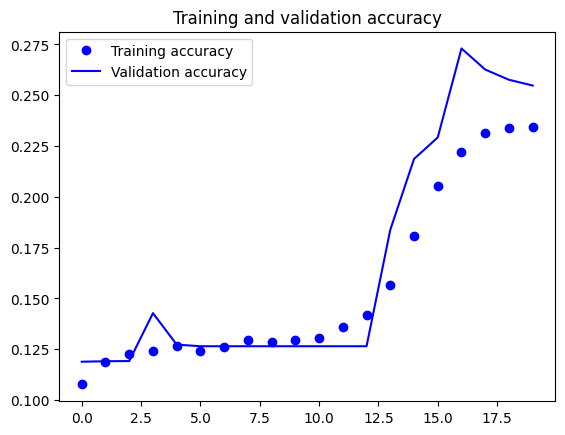

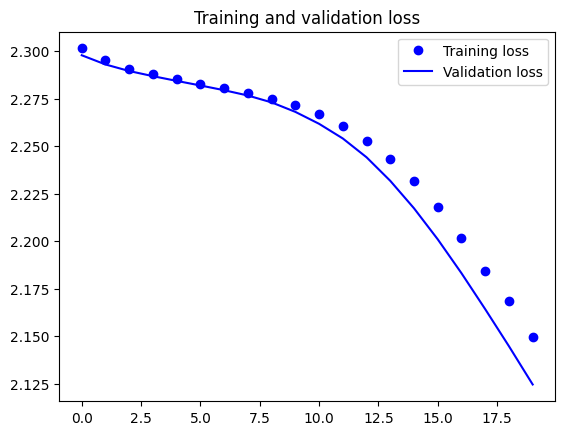

In [23]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
predicted_classes2 = sport_model.predict(test_X)

483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [25]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [26]:
predicted_classes.shape, test_Y.shape

((15426,), (15426,))

# Aprendamos de los errores: Qué mejorar

Found 3919 correct labels


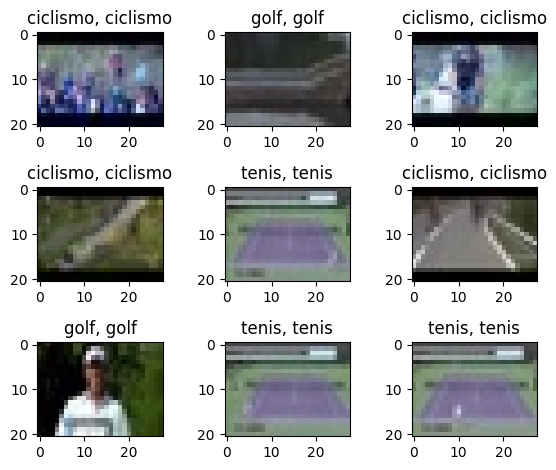

In [27]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 11507 incorrect labels


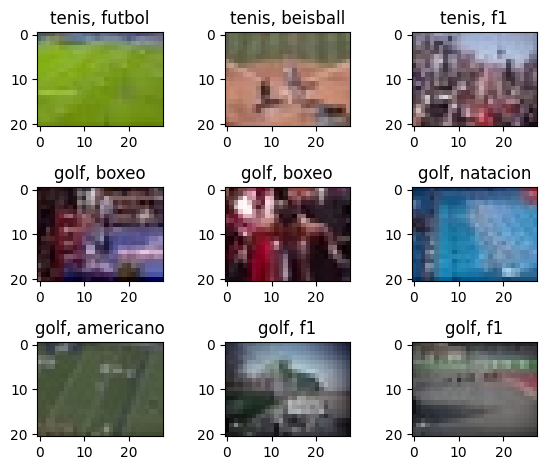

In [28]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [29]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.04      0.00      0.00      1930
     Class 1       0.13      0.02      0.03      1733
     Class 2       0.00      0.00      0.00      1515
     Class 3       0.00      0.00      0.00      1373
     Class 4       0.50      1.00      0.67      1508
     Class 5       0.00      0.00      0.00      1008
     Class 6       0.00      0.00      0.00      1496
     Class 7       0.11      0.28      0.16      1936
     Class 8       0.00      0.00      0.00      1083
     Class 9       0.26      1.00      0.41      1844

    accuracy                           0.25     15426
   macro avg       0.10      0.23      0.13     15426
weighted avg       0.11      0.25      0.14     15426



c:\Users\anais\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\anais\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\anais\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [30]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/TestDeporte/Golf_1.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
C:/Users/anais/OneDrive/Escritorio/TareaIA/InteligenciArtificial/TestDeporte/Golf_1.jpg tenis
